## Reduction methods:

### Load dataset

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [53]:
# import
df = pd.read_csv('dataset/student_depression_dataset.csv')

df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [54]:
df = df.drop(columns=['id'])

df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [55]:
df.shape

(27901, 17)

In [56]:
df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

### Data cleaning

In [57]:
df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [58]:
df = df.dropna()

df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [59]:
duplicated_rows = df[df.duplicated()]

len(duplicated_rows)

0

In [60]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1,True,...,False,False,False,False,False,False,False,False,True,False
1,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0,False,...,False,False,False,False,False,False,False,False,False,True
2,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0,True,...,False,False,False,False,False,False,False,False,False,True
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,False,...,False,False,False,False,False,False,False,False,True,True
4,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,False,...,False,False,False,False,False,False,False,False,True,False


In [61]:
df_encoded.columns

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression', 'Gender_Male',
       ...
       'Degree_MBBS', 'Degree_MCA', 'Degree_MD', 'Degree_ME', 'Degree_MHM',
       'Degree_MSc', 'Degree_Others', 'Degree_PhD',
       'Have you ever had suicidal thoughts ?_Yes',
       'Family History of Mental Illness_Yes'],
      dtype='object', length=110)

In [62]:
df_encoded.shape

(27898, 110)

### Data visualtisation

In [63]:
df_numeric = df.select_dtypes(include=[np.number])

df_numeric.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1
1,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0
2,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1
4,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0


In [64]:
df_numeric.shape

(27898, 9)

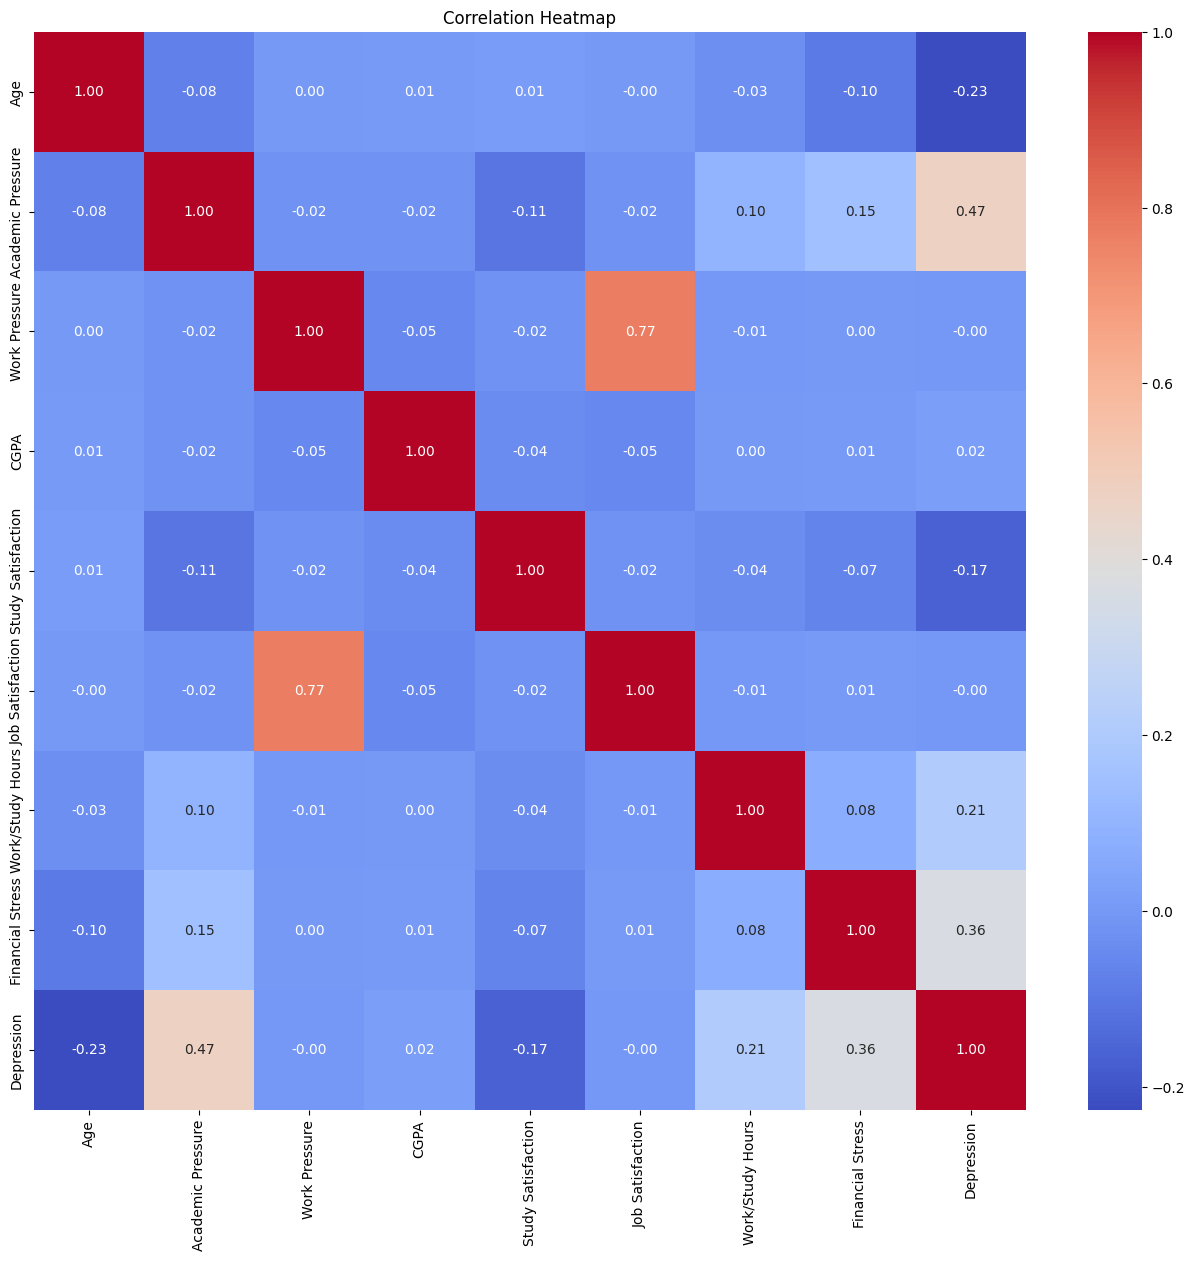

In [68]:
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [71]:
correlation_with_depression = correlation_matrix['Depression']

highly_correlated_features = correlation_with_depression.abs().sort_values(ascending=False)
print("Features highly correlated with 'Depression':")
print(highly_correlated_features)

Features highly correlated with 'Depression':
Depression            1.000000
Academic Pressure     0.474793
Financial Stress      0.363591
Age                   0.226511
Work/Study Hours      0.208627
Study Satisfaction    0.168010
CGPA                  0.022268
Job Satisfaction      0.003483
Work Pressure         0.003351
Name: Depression, dtype: float64


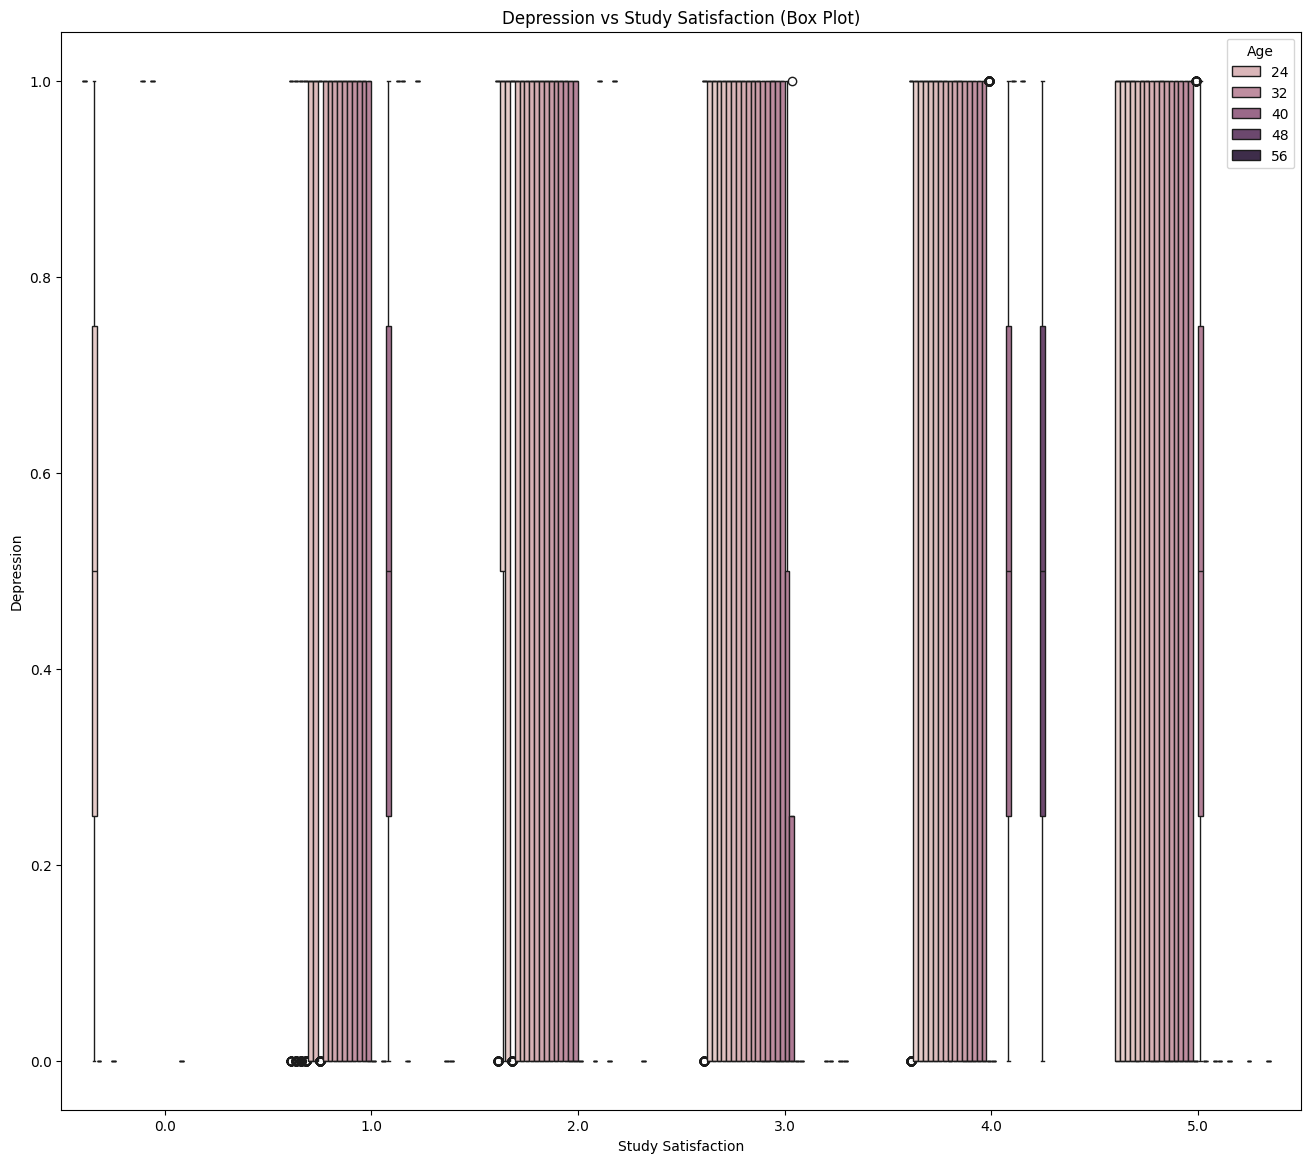

In [76]:
plt.figure(figsize=(16, 14))
sns.boxplot(data=df, x="Study Satisfaction", y="Depression", hue="Age")
plt.title("Depression vs Study Satisfaction (Box Plot)")
plt.show()

### Apply logistic regression

In [133]:
X = df_encoded.drop(columns=["Depression"])
y = df_encoded["Depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      3482
           1       0.85      0.90      0.87      4888

    accuracy                           0.85      8370
   macro avg       0.85      0.84      0.84      8370
weighted avg       0.85      0.85      0.85      8370



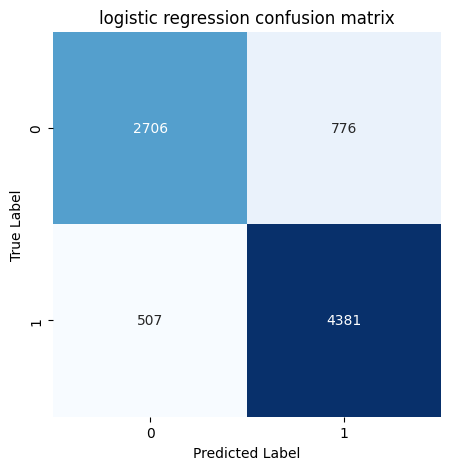

In [86]:
confusion_matrix_logistic = confusion_matrix(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix_logistic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("logistic regression confusion matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

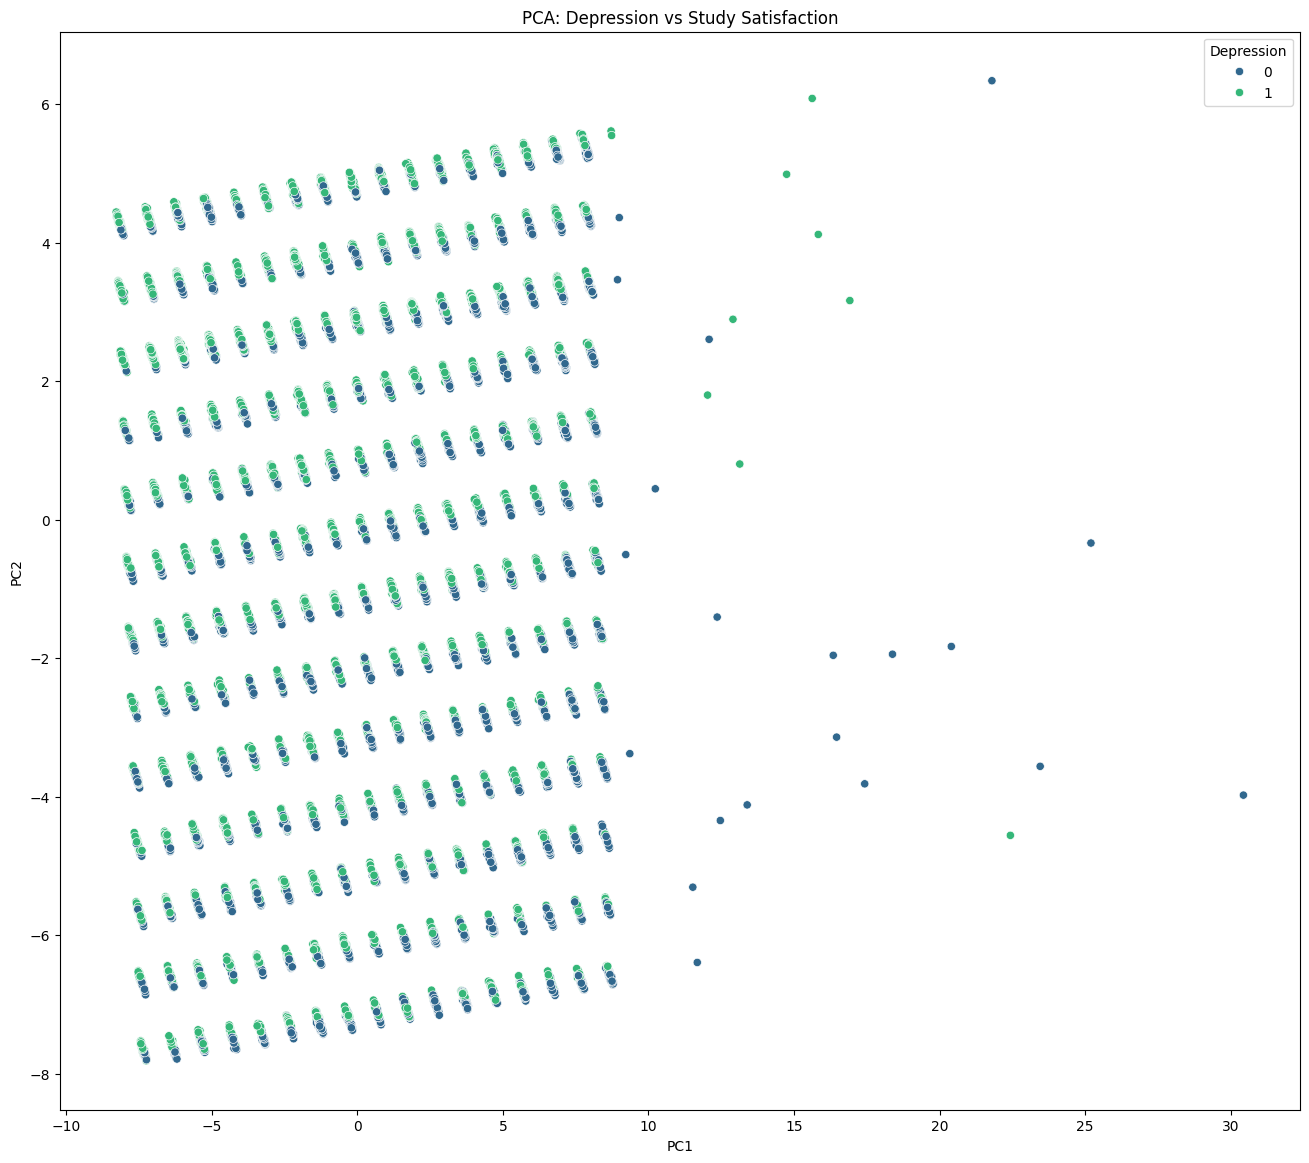

In [108]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# visualization
plt.figure(figsize=(16, 14))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='viridis')
plt.title("PCA: Depression vs Study Satisfaction")
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

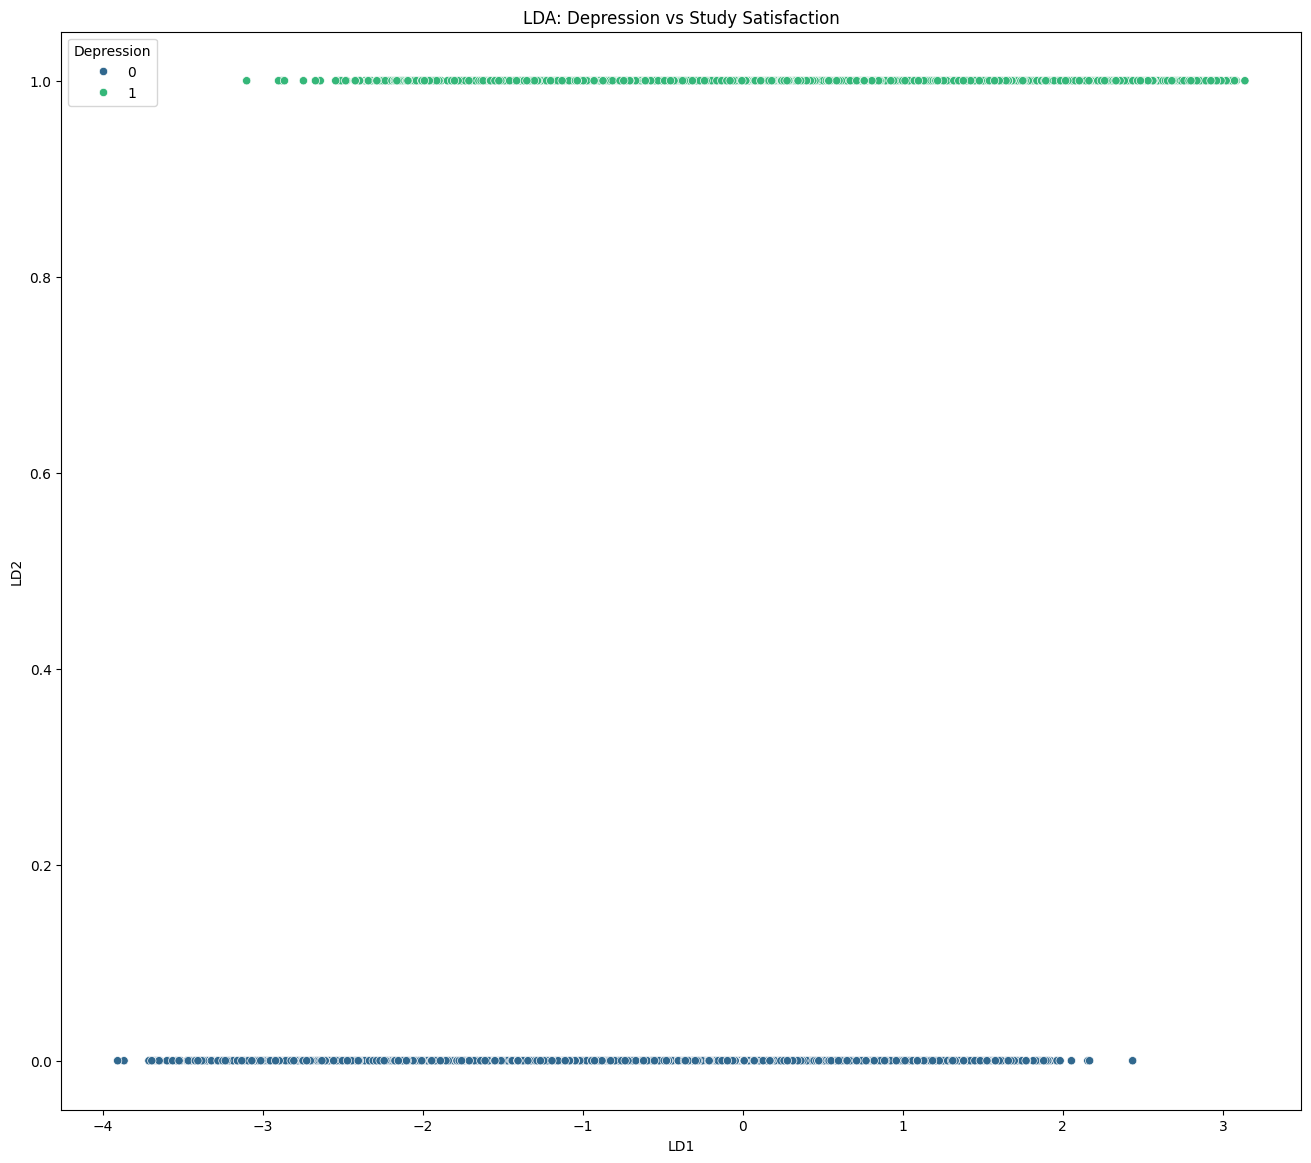

In [109]:
# LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_train, y_train)

# visualization
plt.figure(figsize=(16, 14))
sns.scatterplot(x=X_lda[:, 0], y=y_train, hue=y_train, palette='viridis')
plt.title("LDA: Depression vs Study Satisfaction")
plt.xlabel('LD1')
plt.ylabel('LD2')

plt.show()

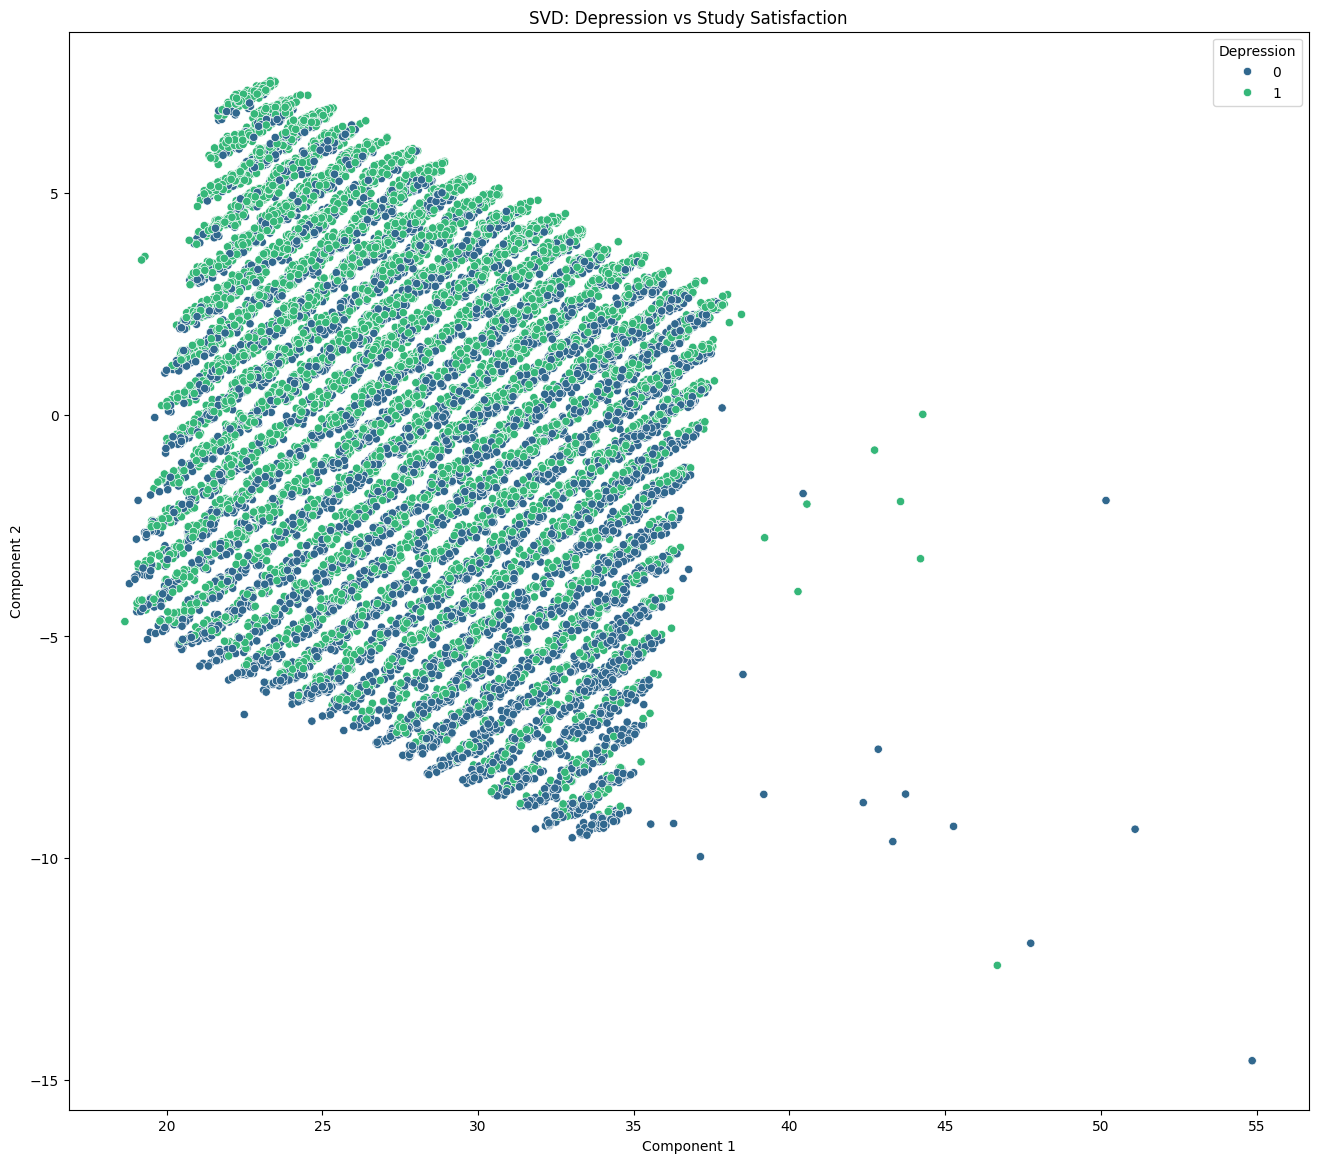

In [ ]:
# SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_train)


plt.figure(figsize=(16, 14))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=y_train, palette='viridis')
plt.title("SVD: Depression vs Study Satisfaction")
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()

In [134]:
y_pred = model.predict(X_test)
print("Without Dimensionality Reduction:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Without Dimensionality Reduction:
Accuracy: 0.8467144563918757
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      3482
           1       0.85      0.90      0.87      4888

    accuracy                           0.85      8370
   macro avg       0.85      0.84      0.84      8370
weighted avg       0.85      0.85      0.85      8370

ROC-AUC: 0.9225534805607704


In [135]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
print("With PCA:")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test_pca)[:, 1]))

With PCA:
Accuracy: 0.656989247311828
              precision    recall  f1-score   support

           0       0.63      0.44      0.51      3482
           1       0.67      0.81      0.73      4888

    accuracy                           0.66      8370
   macro avg       0.65      0.63      0.62      8370
weighted avg       0.65      0.66      0.64      8370

ROC-AUC: 0.6895934175385029


In [136]:
X_test_lda = lda.transform(X_test)

model.fit(X_lda, y_train)
y_pred_lda = model.predict(X_test_lda)
print("With LDA:")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test_lda)[:, 1]))

With LDA:
Accuracy: 0.8444444444444444
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      3482
           1       0.85      0.90      0.87      4888

    accuracy                           0.84      8370
   macro avg       0.84      0.83      0.84      8370
weighted avg       0.84      0.84      0.84      8370

ROC-AUC: 0.9208678182206175


In [137]:
X_test_svd = svd.transform(X_test)

model.fit(X_svd, y_train)
y_pred_svd = model.predict(X_test_svd)
print("With SVD:")
print("Accuracy:", accuracy_score(y_test, y_pred_svd))
print(classification_report(y_test, y_pred_svd))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test_svd)[:, 1]))

With SVD:
Accuracy: 0.6531660692951016
              precision    recall  f1-score   support

           0       0.62      0.42      0.50      3482
           1       0.67      0.82      0.73      4888

    accuracy                           0.65      8370
   macro avg       0.64      0.62      0.62      8370
weighted avg       0.65      0.65      0.64      8370

ROC-AUC: 0.6899434172094785
